In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16()

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
# where this model is downloaded? in my computer?
# C:\Users\bhara\.keras\models\vgg16_weights_tf_dim_ordering_tf_kernels.h5

## Tearing the filters of VGG16 CNN 

In [4]:
from keras.utils import plot_model
plot_model(model)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [5]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    print(i, layer.name, layer.input_shape, layer.output_shape)

0 input_1 [(None, 224, 224, 3)] [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 3) (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64) (None, 224, 224, 64)
3 block1_pool (None, 224, 224, 64) (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 64) (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128) (None, 112, 112, 128)
6 block2_pool (None, 112, 112, 128) (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 128) (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256) (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256) (None, 56, 56, 256)
10 block3_pool (None, 56, 56, 256) (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 256) (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512) (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512) (None, 28, 28, 512)
14 block4_pool (None, 28, 28, 512) (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512) (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512) (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512) (None, 14, 14

In [6]:
for i in range(len(model.layers)):
    if "conv" not in model.layers[i].name:
        continue
    filters, biases = model.layers[i].get_weights()
    print("layer", i, model.layers[i].name, "filters shape:", filters.shape)

layer 1 block1_conv1 filters shape: (3, 3, 3, 64)
layer 2 block1_conv2 filters shape: (3, 3, 64, 64)
layer 4 block2_conv1 filters shape: (3, 3, 64, 128)
layer 5 block2_conv2 filters shape: (3, 3, 128, 128)
layer 7 block3_conv1 filters shape: (3, 3, 128, 256)
layer 8 block3_conv2 filters shape: (3, 3, 256, 256)
layer 9 block3_conv3 filters shape: (3, 3, 256, 256)
layer 11 block4_conv1 filters shape: (3, 3, 256, 512)
layer 12 block4_conv2 filters shape: (3, 3, 512, 512)
layer 13 block4_conv3 filters shape: (3, 3, 512, 512)
layer 15 block5_conv1 filters shape: (3, 3, 512, 512)
layer 16 block5_conv2 filters shape: (3, 3, 512, 512)
layer 17 block5_conv3 filters shape: (3, 3, 512, 512)


In [7]:
# retrieve weights from first conv layer
filter ,biases = model.layers[1].get_weights()

In [8]:
# normalise filter values to 0-1 so we can visualize them
f_min, f_max = filter.min(), filter.max()
filters = (filter - f_min) / (f_max - f_min)

In [9]:
# import the pyplot module
import matplotlib.pyplot as pyplot

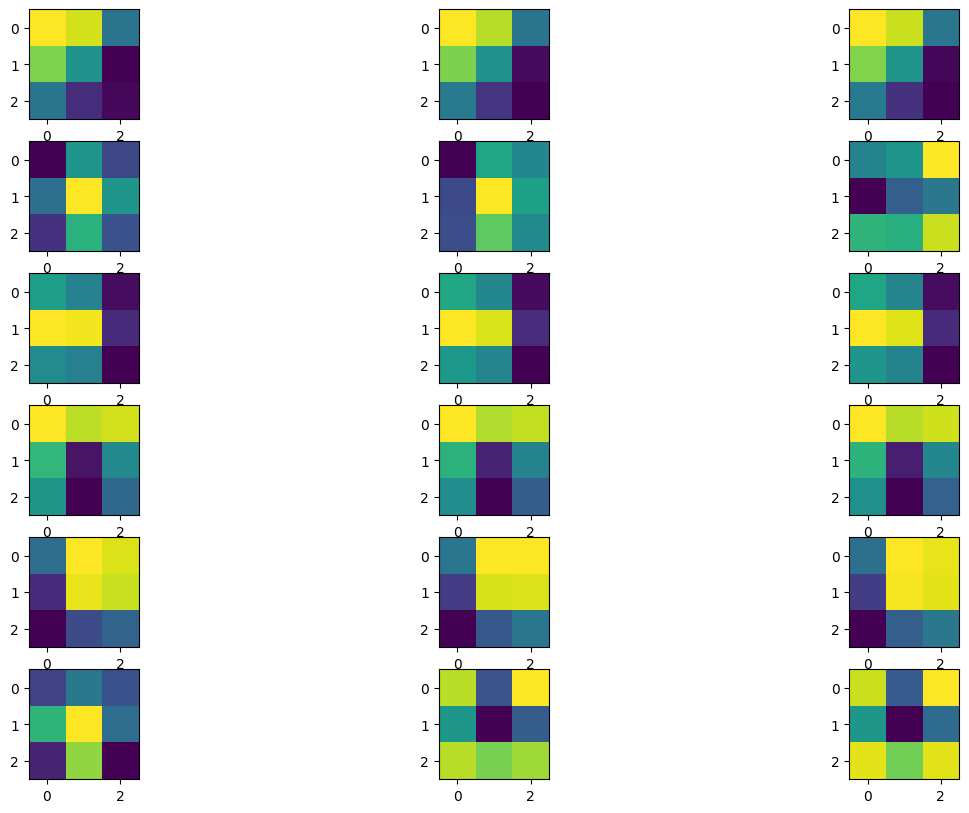

In [10]:
n_filters= 6
ix =1
fig = pyplot.figure(figsize=(15,10))
for i in range(n_filters):
    f = filters[:, :, :, i]# select ith filter 
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        pyplot.subplot(n_filters, 3, ix)
        # pyplot.imshow(f[:, :, j], cmap='') # i want to see colors 
        pyplot.imshow(f[:, :, j])
        ix += 1
pyplot.show()
        

In [11]:
from keras.models import Model

In [12]:
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [13]:
from keras.utils import load_img, img_to_array
from numpy import expand_dims
from keras.applications.vgg16 import preprocess_input

In [14]:
image = load_img("bharat.jpg", target_size=(224, 224))
iamge = img_to_array(image)
# expand dimensions to match the shape of model input
image = expand_dims(image, axis=0)
image = preprocess_input(image)

In [15]:
# calculate feature map

feature_maps = model.predict(image)
print(feature_maps.shape)   

1/1 [==============================] - 7s 7s/step
(1, 224, 224, 64)


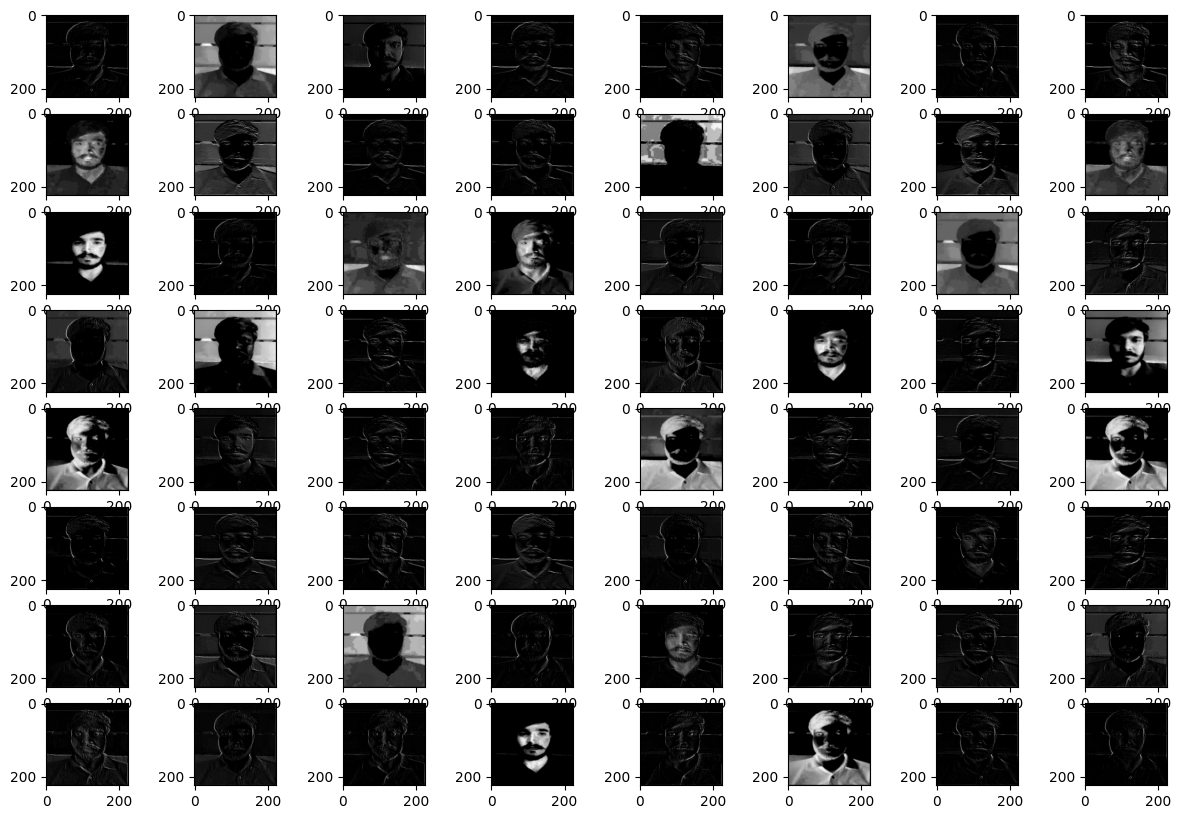

In [16]:
fig = pyplot.figure(figsize=(15,10))
for i in range(1,feature_maps.shape[3]+1):
    pyplot.subplot(8, 8, i)
    pyplot.imshow(feature_maps[0, :, :, i-1], cmap='gray')
pyplot.show()

ResourceExhaustedError: {{function_node __wrapped__AddV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:AddV2]